In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.1.0+cu121'

In [3]:
weight = 0.7
bias = 0.3

start, end = 0, 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias


In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


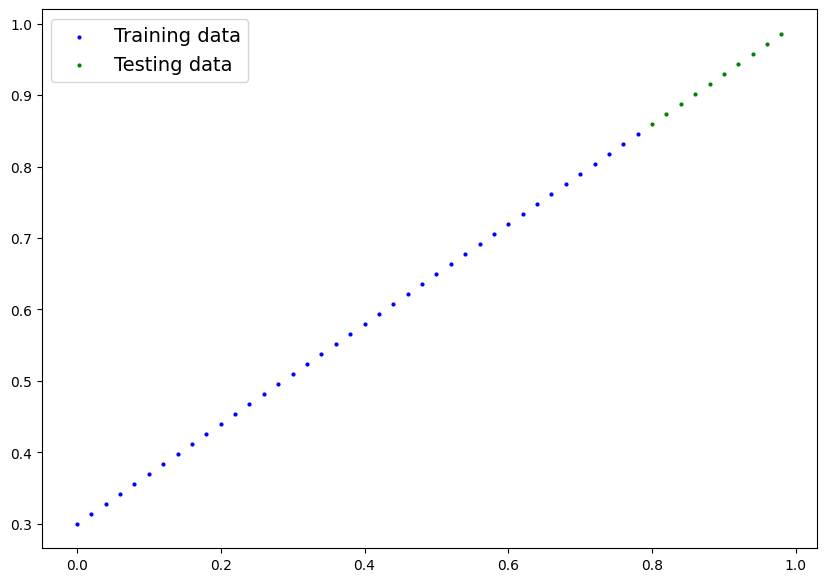

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.legend(prop={"size": 14});

In [5]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
  def forward(self, x:torch.Tensor):
    return self.weights * x + self.bias

In [6]:
torch.manual_seed(42)
model = LinearRegressionModel()
list(model.parameters())
print(model.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [7]:
with torch.inference_mode():
  y_pred = model(X_test)

In [8]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


In [9]:
torch.manual_seed(42)

train_loss_values = []
test_loss_values = []
epoch_count = []

epochs = 100

for epoch in range(epochs):
  model.train() #включение тренировочного режима
  y_pred = model(X_train) #тренировка
  loss = loss_fn(y_pred, y_train) #определение ошибки МАЕ
  optimizer.zero_grad() #обнуляем все градиенты, чтобы они не суммировались
  loss.backward() #добавляем ошибки оптимизатору
  optimizer.step() #обновляем параметры

  #testing
  model.eval() #включение evaluation mode
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


In [10]:
model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

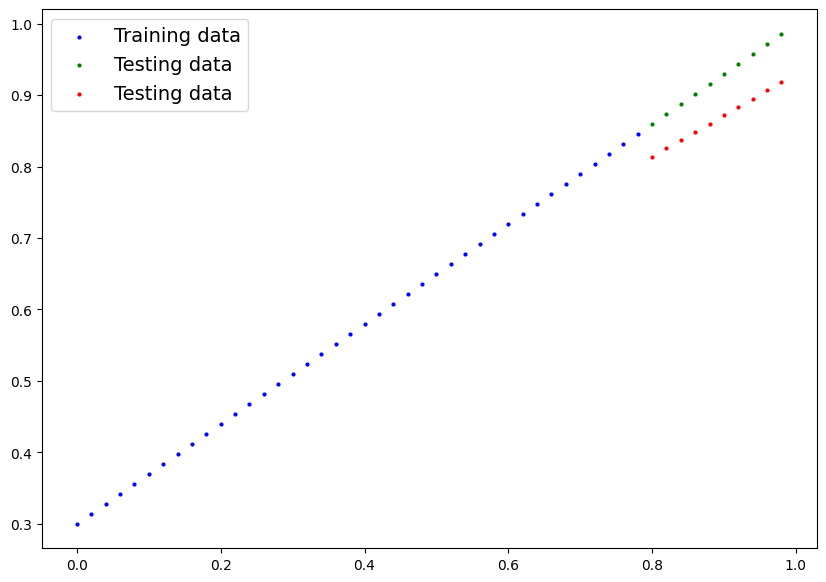

In [11]:
model.eval()
with torch.inference_mode():
  y_pred = model(X_test)
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")
plt.scatter(X_test, y_pred, c='r', s=4, label="Testing data")
plt.legend(prop={"size": 14})

In [12]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'first_pytorhc_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict, f=MODEL_SAVE_PATH)